# Quickstart
## Basic inference
The easiest way to get started is by using the {class}`~fastdfe.base_inference.BaseInference` class which infers the DFE from a single pairs of SFSs, one neutral and one selected. In this example we create {class}`~fastdfe.spectrum.Spectrum` objects holding the SFS counts and pass it to {class}`~fastdfe.base_inference.BaseInference`. Note that we are required to specify the number of monomorphic sites (the last and first entries of the specified counts).

In [1]:
setwd("../../")

In [2]:
source("R/fastdfe.R")

# import classes
base_inference <- fastdfe$BaseInference
spectrum <- fastdfe$Spectrum

# configure inference
inf <- base_inference(
  sfs_neut=spectrum(c(177130, 997, 441, 228, 156, 117, 114, 83, 105, 109, 652)),
  sfs_sel=spectrum(c(797939, 1329, 499, 265, 162, 104, 117, 90, 94, 119, 794))
)

# Run inference
s <- base_inference$run(inf)

fastDFE uses maximum likelihood estimation (MLE) to find the DFE. By default, 10 local optimization runs are carried out to make sure a reasonably good global optimum has been bound. The DFE furthermore needs to parametrized where {class}`~fastdfe.parametrization.GammaExpParametrization` is used by default.

We can now plot the inferred DFE in discretized form (cf. {func}`~fastdfe.base_inference.BaseInference.plot_discretized`).

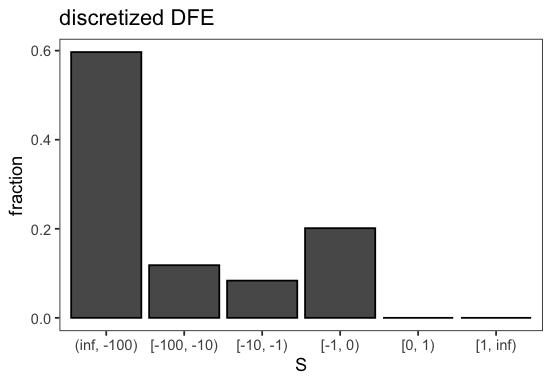

In [3]:
p <- base_inference$plot_discretized(inf)

We can also plot a comparison of the (selected) modelled and observed SFS (cf. {func}`~fastdfe.base_inference.BaseInference.plot_sfs_comparison`).

In [4]:
p <- base_inference$plot_sfs_comparison(inf)

## Bootstrapping

We can perform parametric bootstrapping (cf. {func}`~fastdfe.base_inference.BaseInference.bootstrap`)

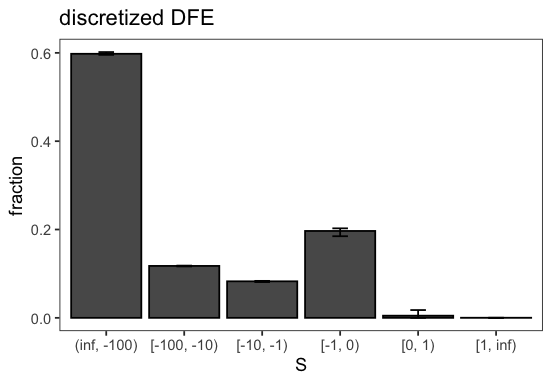

In [5]:
bs <- inf$bootstrap()

# redo the plotting
p <- base_inference$plot_discretized(inf)

## Serialization

In [6]:
# save the inference object to the file
# we can unserialized the inference by using BaseInference.from_file
inf$to_file("serialized.json")

# alternatively we can also save a summary to file
inf$get_summary()$to_file("summary.json")